In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from tensorflow import keras
import matplotlib as plt 
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

170498071/170498071 [==============================] - 2s 0us/step


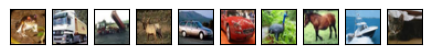

In [3]:
import matplotlib.pyplot as plt

fig = plt.figure( (x_train[0]).size )
for i in range(10):
    ax=fig.add_subplot(3,12,i+1,xticks=[],yticks=[])
    ax.imshow(x_train[i])

In [4]:
f=[]
for i in range(len(y_train)):
    if y_train[i] not in f:
        print(y_train[i])
        f.append(y_train[i])

[6]
[9]
[4]
[1]
[2]
[7]
[8]
[3]
[5]
[0]


In [5]:
from keras.utils.np_utils import to_categorical as to_Catagorical
y_train=to_Catagorical(y_train,num_classes=len(f))
y_test=to_Catagorical(y_test,num_classes=len(f))

x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255



In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=666)



the model is unsing the alexnet artitechture somewhaT

In [7]:

from tensorflow import keras 
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
model=Sequential( [
    
    Conv2D(filters=16,kernel_size=2,padding='same',activation='relu',
           input_shape=(32,32,3))
    ,MaxPooling2D(pool_size=2)
    ,Conv2D(filters=32,kernel_size=2,padding='same',activation='relu'),
    MaxPooling2D(pool_size=2),
    Conv2D(filters=64,kernel_size=2,padding='same',activation='relu'),
    MaxPooling2D(pool_size=2),
    Dropout(0.3),
    Flatten(),
    Dense(500,activation='relu'),
    Dropout(0.4),
    Dense(units=10,activation='softmax')    
    
    
])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        2080      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          8256      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 64)         0

In [8]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


In [9]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath='cifer_10 _weights.hdf5', verbose=1, save_best_only=True)
hist=model.fit(X_train,Y_train,epochs=100,batch_size=32,validation_data=(x_test,y_test),callbacks=[checkpointer],verbose=1,shuffle=True)

Epoch 1/100


2023-08-12 16:28:57.040790: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


1242/1250 [============================>.] - ETA: 0s - loss: 1.6343 - accuracy: 0.4022
Epoch 1: val_loss improved from inf to 1.31340, saving model to cifer_10 _weights.hdf5
1250/1250 [==============================] - 17s 5ms/step - loss: 1.6330 - accuracy: 0.4029 - val_loss: 1.3134 - val_accuracy: 0.5374
Epoch 2/100
1250/1250 [==============================] - ETA: 0s - loss: 1.3167 - accuracy: 0.5268
Epoch 2: val_loss improved from 1.31340 to 1.13749, saving model to cifer_10 _weights.hdf5
1250/1250 [==============================] - 7s 5ms/step - loss: 1.3167 - accuracy: 0.5268 - val_loss: 1.1375 - val_accuracy: 0.5966
Epoch 3/100
1247/1250 [============================>.] - ETA: 0s - loss: 1.1840 - accuracy: 0.5763
Epoch 3: val_loss improved from 1.13749 to 1.05110, saving model to cifer_10 _weights.hdf5
1250/1250 [==============================] - 6s 5ms/step - loss: 1.1838 - accuracy: 0.5764 - val_loss: 1.0511 - val_accuracy: 0.6252
Epoch 4/100
1246/1250 [=======================

TRAINING WITH DIFFERENT DATA EACH TIME ,so it doesnt work becasue epochs us ===is not a while loop

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size=0.2)


from tensorflow import keras 
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
model=Sequential( [
    
    Conv2D(filters=16,kernel_size=2,padding='same',activation='relu',
           input_shape=(32,32,3))
    ,MaxPooling2D(pool_size=2)
    ,Conv2D(filters=32,kernel_size=2,padding='same',activation='relu'),
    MaxPooling2D(pool_size=2),
    Conv2D(filters=64,kernel_size=2,padding='same',activation='relu'),
    MaxPooling2D(pool_size=2),
    Dropout(0.3),
    Flatten(),
    Dense(500,activation='relu'),
    Dropout(0.4),
    Dense(units=10,activation='softmax')    
    
    
])


model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath='cifer_10 _weights_RANDOM.hdf5', verbose=1, save_best_only=True)
hist=model.fit(X_train,Y_train,epochs=100,batch_size=32,validation_data=(x_test,y_test),callbacks=[checkpointer],verbose=1,shuffle=True)

Epoch 1/100


2023-08-12 16:40:02.878466: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout_2/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


1248/1250 [============================>.] - ETA: 0s - loss: 1.6307 - accuracy: 0.4100
Epoch 1: val_loss improved from inf to 1.30224, saving model to cifer_10 _weights_RANDOM.hdf5
1250/1250 [==============================] - 9s 6ms/step - loss: 1.6303 - accuracy: 0.4101 - val_loss: 1.3022 - val_accuracy: 0.5312
Epoch 2/100
1247/1250 [============================>.] - ETA: 0s - loss: 1.2994 - accuracy: 0.5358
Epoch 2: val_loss improved from 1.30224 to 1.13771, saving model to cifer_10 _weights_RANDOM.hdf5
1250/1250 [==============================] - 6s 5ms/step - loss: 1.2988 - accuracy: 0.5359 - val_loss: 1.1377 - val_accuracy: 0.5949
Epoch 3/100
1243/1250 [============================>.] - ETA: 0s - loss: 1.1663 - accuracy: 0.5859
Epoch 3: val_loss improved from 1.13771 to 1.05115, saving model to cifer_10 _weights_RANDOM.hdf5
1250/1250 [==============================] - 7s 5ms/step - loss: 1.1660 - accuracy: 0.5858 - val_loss: 1.0512 - val_accuracy: 0.6285
Epoch 4/100
1245/1250 [===

SO THE MODEL SUCKS ASS